In [1]:
from flask import Flask
import eventlet.wsgi
import eventlet
import socketio
import base64
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sio = socketio.Server()
app = Flask(__name__)

def send_control(steering_angle, throttle):
    sio.emit("steer", data={'steering_angle': str(steering_angle),
                            'throttle': str(throttle) }, skip_sid=True)



(39060) wsgi starting up on http://0.0.0.0:4567
(39060) accepted ('127.0.0.1', 57521)


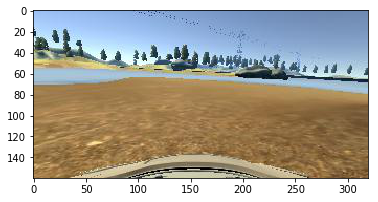

<class 'str'>


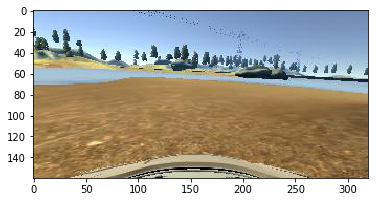

<class 'str'>


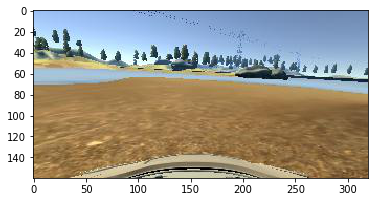

<class 'str'>


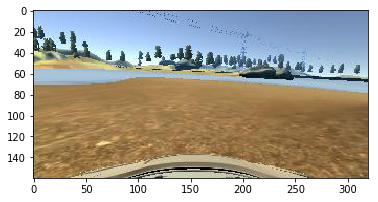

<class 'str'>


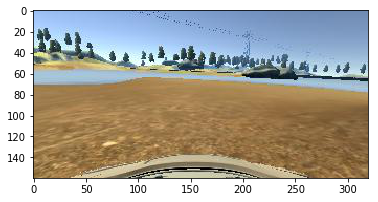

<class 'str'>


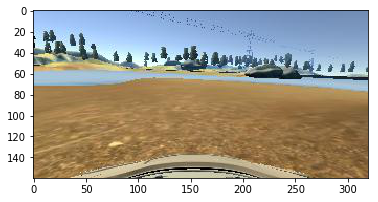

<class 'str'>


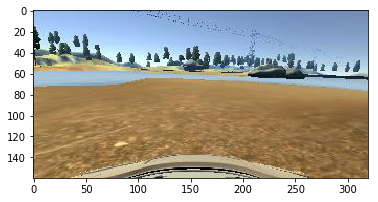

<class 'str'>


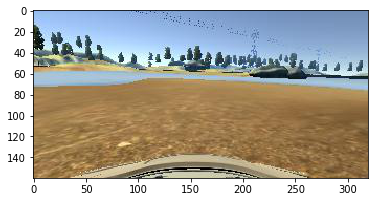

<class 'str'>


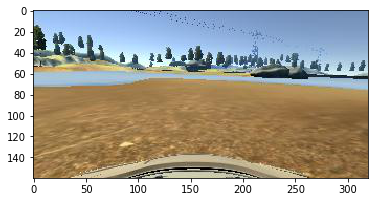

<class 'str'>


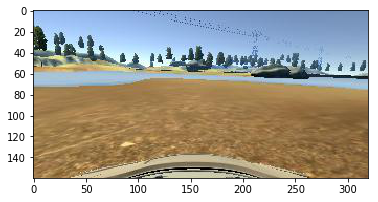

<class 'str'>


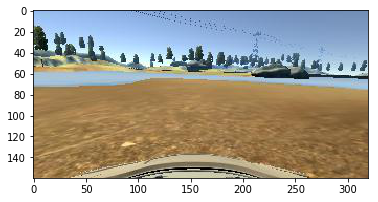

<class 'str'>


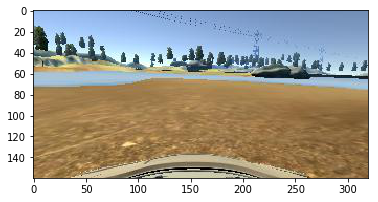

<class 'str'>


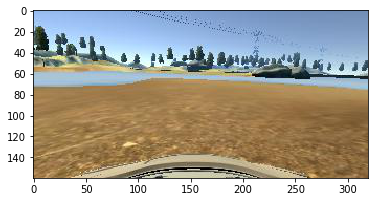

<class 'str'>


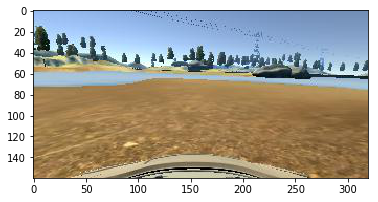

<class 'str'>


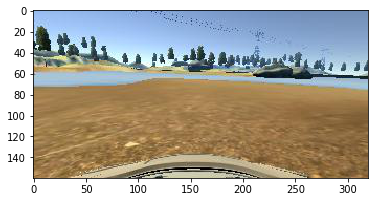

<class 'str'>


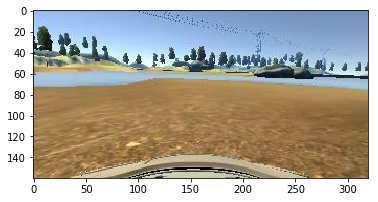

<class 'str'>


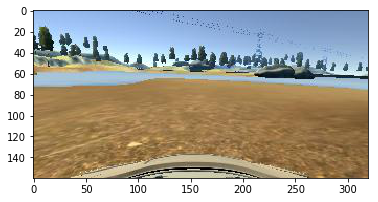

<class 'str'>


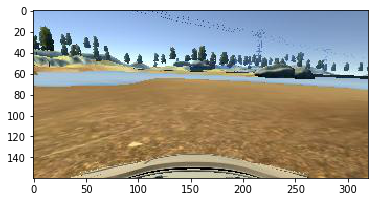

<class 'str'>


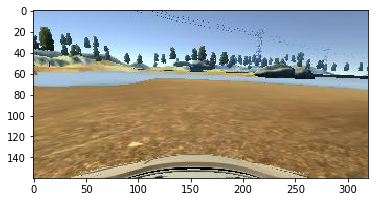

<class 'str'>


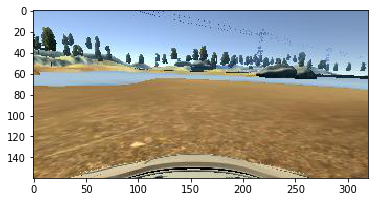

<class 'str'>


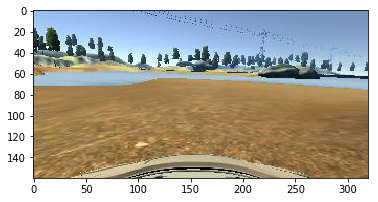

<class 'str'>


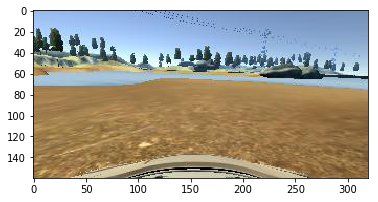

<class 'str'>


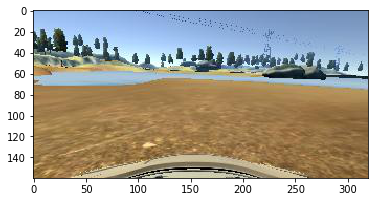

<class 'str'>


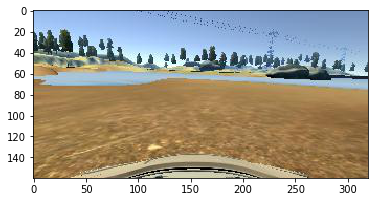

<class 'str'>


(39060) accepted ('127.0.0.1', 57534)


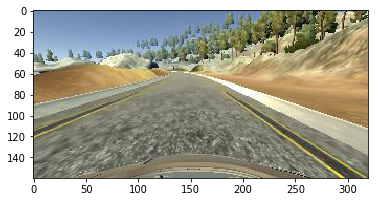

<class 'str'>


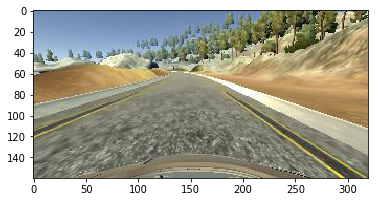

<class 'str'>


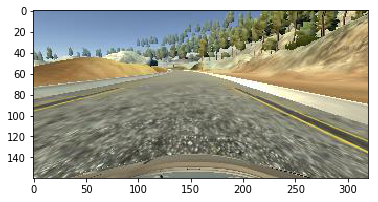

<class 'str'>


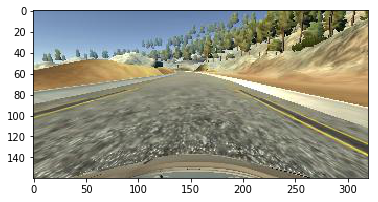

<class 'str'>


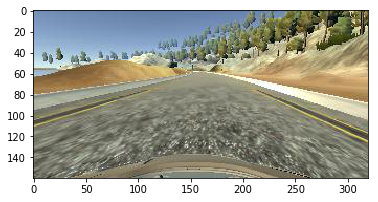

<class 'str'>


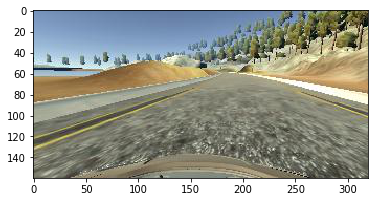

<class 'str'>


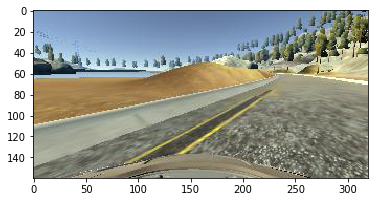

<class 'str'>


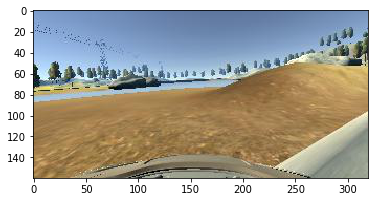

<class 'str'>


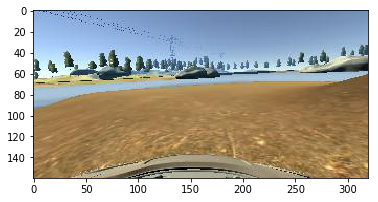

<class 'str'>


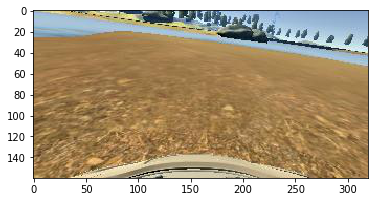

<class 'str'>


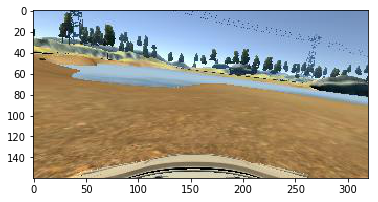

<class 'str'>


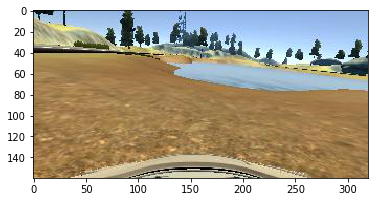

<class 'str'>


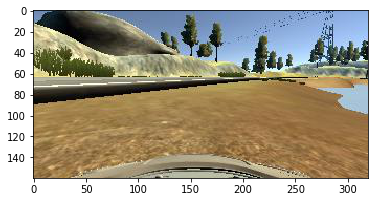

<class 'str'>


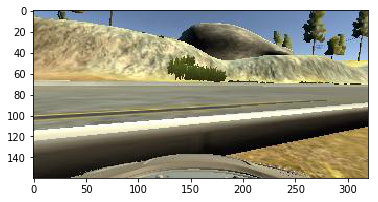

<class 'str'>


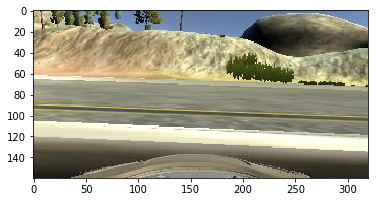

<class 'str'>


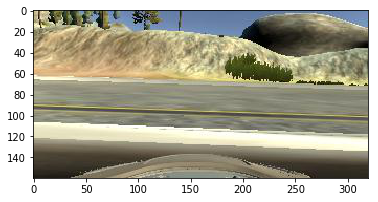

In [ ]:
@sio.on('telemetry')
def telemetry(sid, data):
    if data:
        speed = float(data["speed"])
        image_str = data["image"]
        
        decoded = base64.b64decode(image_str)
        image = Image.open(BytesIO(decoded))
        image_array = np.asarray(image)
        
        plt.imshow(image_array)
        plt.show()
        
        print(type(image_str))

        steering_angle = -1.0 # -1.0 ... 1.0
        throttle = 1.0 # 0.1 ... 1.0

        send_control(steering_angle, throttle)
    else:
        sio.emit('manual', data={}, skip_sid=True)
        
app = socketio.Middleware(sio, app)
eventlet.wsgi.server(eventlet.listen(('', 4567)), app)